**Module 9 : Introduction To NLP - Assignment**

**Problem Statement:**
You are a Data Scientist in a big firm. You have to develop a deep learning model
to perform sentiment analysis on a dataset of tweets related to various
candidates.

**Importing Required Libraries**

In [15]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data Loading**

In [16]:
df = pd.read_csv('/content/twitter_training.csv',encoding="Latin-1",quotechar='"')

**Data Preprocessing**

Checking All the Columns in the Table

In [17]:
df.columns

Index(['Id', 'Candidate', 'Sentiment', 'Text', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

Framing Dataset According to the Requirement

In [18]:
df = df[['Candidate', 'Sentiment', 'Text']]

Dropping Null Values

In [19]:
df.dropna(inplace=True)

Preprocessing the Text Column as per are requirement

In [20]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['Text'].apply(clean_text)

Label Encoding

In [21]:
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['Sentiment'])

print("Unique encoded values and original sentiments:")
for encoded_value, original_sentiment in zip(df['sentiment_encoded'].unique(), le.inverse_transform(df['sentiment_encoded'].unique())):
    print(f"Encoded: {encoded_value}, Original: {original_sentiment}")

Unique encoded values and original sentiments:
Encoded: 3, Original: Positive
Encoded: 2, Original: Neutral
Encoded: 1, Original: Negative
Encoded: 0, Original: Irrelevant


**Text Vertorization**

In [22]:
MAX_NUM_WORDS = 5000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['clean_text'].values)
X = tokenizer.texts_to_sequences(df['clean_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

y = to_categorical(df['sentiment_encoded'], num_classes=len(le.classes_))

**Train Test Split**

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Building The Deep Learning Model**

In [24]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # 3 sentiment classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Training The Model**

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 307s 328ms/step - accuracy: 0.4891 - loss: 1.1516 - val_accuracy: 0.6580 - val_loss: 0.8528
Epoch 2/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 330s 336ms/step - accuracy: 0.6976 - loss: 0.7664 - val_accuracy: 0.6939 - val_loss: 0.7828
Epoch 3/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 324s 339ms/step - accuracy: 0.7460 - loss: 0.6551 - val_accuracy: 0.7265 - val_loss: 0.7105
Epoch 4/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 318s 334ms/step - accuracy: 0.7788 - loss: 0.5697 - val_accuracy: 0.7450 - val_loss: 0.6665
Epoch 5/5
925/925 ━━━━━━━━━━━━━━━━━━━━ 320s 332ms/step - accuracy: 0.8069 - loss: 0.4969 - val_accuracy: 0.7600 - val_loss: 0.6406


**Visualizing Training Progress**

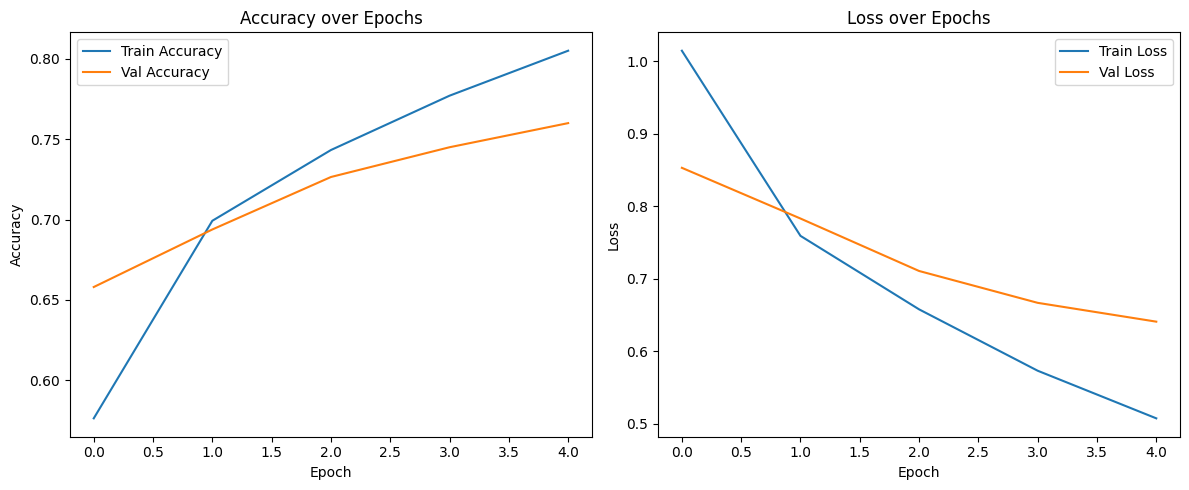

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
